In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report


In [73]:
data = pd.read_csv('creditcard.csv')

In [74]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [75]:
print("length of training data",len(data))
print("length of normal data",len(data[data["Class"]==0]))
print("length of fraud  data",len(data[data["Class"]==1]))

length of training data 284807
length of normal data 284315
length of fraud  data 492


In [76]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [77]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
data_train_X.columns
data_train_y.columns

length of training data
199364
length of test data
85443


Index(['Class'], dtype='object')

In [78]:
# Now we have a traing data
data_train_X["Class"]= data_train_y["Class"] # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data",len(fraud_data))

length of training data 199364
length of normal data 199025
length of fraud data 339


In [79]:
# Now start oversampling of training data 
# means we will duplicate many times the value of fraud data
for i in range (365):  # the number is choosen on basis of nnumber of fraud transaction
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  322760
Number of normal transcation in oversampled data 199025
No.of fraud transcation 123735
Proportion of Normal data in oversampled data is  0.6166346511339695
Proportion of fraud data in oversampled data is  0.38336534886603046


In [80]:
# before applying any model standerdize our data amount 
os_data["Normalized Amount"] = StandardScaler().fit_transform(os_data['Amount'].values.reshape(-1, 1))
os_data.drop(["Time","Amount"],axis=1,inplace=True)
os_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
205059,-1.391305,0.116979,0.297076,0.258042,-0.281132,0.424976,-0.583449,0.352227,-0.738469,0.930499,...,0.128380,0.750596,-0.277922,0.259807,-0.470461,-0.344876,-0.571860,0.377722,0,-0.265213
228447,-0.536195,1.335664,-0.189138,-0.615918,0.163416,-1.134648,0.723638,0.170680,-0.175881,-0.358998,...,-0.242243,-0.532338,0.104148,-0.005493,-0.372704,0.145606,0.244282,0.085072,0,-0.365868
70581,-0.865894,0.475476,1.351313,-0.933106,-0.513452,-0.340734,-0.036963,0.654538,-0.476130,-0.900145,...,0.053360,-0.202841,0.233645,0.244310,-0.529880,0.608505,-0.183923,-0.090234,0,-0.215534
92609,0.179736,-1.344464,-0.604072,1.420730,-0.247348,0.124113,0.870044,-0.093957,-0.458721,-0.031717,...,0.340584,-0.180459,-0.571724,-0.281485,0.461669,-0.364694,-0.086315,0.090400,0,1.668433
170761,-0.075148,0.981137,0.212873,-0.642528,0.558319,-1.016016,1.070621,-0.291876,-0.116072,-0.330003,...,-0.242506,-0.516128,0.062934,-0.091145,-0.443438,0.131918,0.119782,0.094097,0,-0.387187


In [81]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

length of training data
225932
length of test data
96828
the recall for this model is : 1.0
TP 37466
TN 59358
FP 4
FN 0


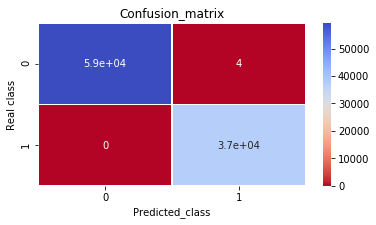


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59362
          1       1.00      1.00      1.00     37466

avg / total       1.00      1.00      1.00     96828



In [82]:
# Now use this oversampled data for trainig the model and predict value for the test data that we created before
# now let us try within the the oversampled data itself
# for that we need to split our oversampled data into train and test
# so call our function data Prepration with oversampled data
os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(os_data)
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

In [36]:
#Note:

#since we have too many sample of same fraud data so may be the all which are present in train data are present in test data also so we can say it is over fitting